In [9]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import csv
import statsmodels.api as sm

In [10]:
data = []
path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
with open(path, 'r') as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        data.append(row)
enc = preprocessing.OrdinalEncoder()
data = enc.fit_transform(data)
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit_transform(data)

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.7631691 , 0.        , 0.        , ..., 0.28138801, 0.38355535,
        0.5       ],
       [0.56254437, 0.5       , 0.        , ..., 0.50599369, 0.22446792,
        0.5       ],
       ...,
       [0.47806333, 0.        , 0.        , ..., 0.27823344, 0.45842903,
        0.5       ],
       [0.84253869, 0.5       , 0.5       , ..., 0.69337539, 0.40728832,
        1.        ],
       [0.3160585 , 0.5       , 0.        , ..., 0.06750789, 0.82789772,
        0.5       ]])

Text(0, 0.5, '$y$')

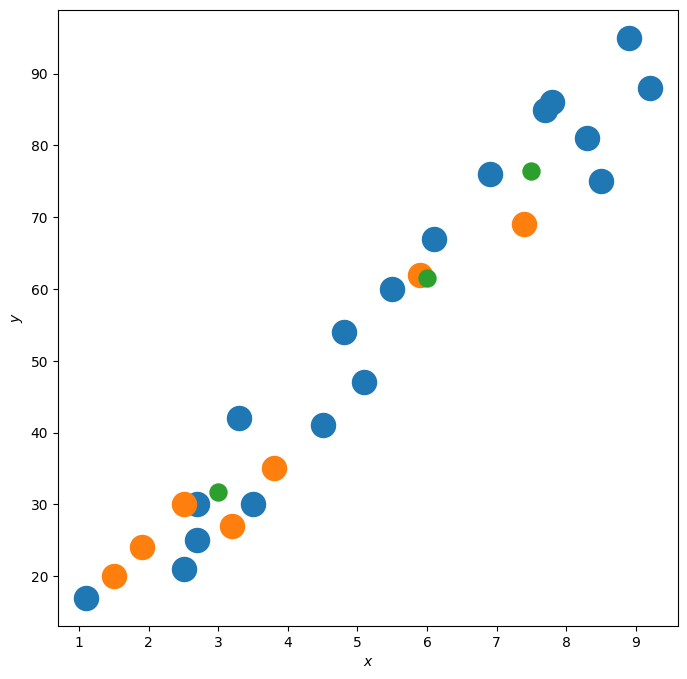

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('score.csv')
X = np.array(df['Hours'])
y = np.array(df['Scores'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
lr = LinearRegression().fit(X_train,y_train)
a = lr.coef_[0]
b = lr.intercept_
fig_scat, ax_scat = plt.subplots(1,1,figsize=(8,8))
x = X_train.T
m = X_test.T
pred = [a*7.5+b, a*6+b, a*3+b]

ax_scat.scatter(x,y_train,s=300, label='Training')
ax_scat.scatter(m,y_test,s=300, label='Test')
ax_scat.scatter([7.5,6,3], pred,s=150, label='Predictions')

ax_scat.set_xlabel(r'$x$')
ax_scat.set_ylabel(r'$y$')








In [12]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f"Elastic Net-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {ridge.score(X_test, y_test):.2f}")
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print(f"Elastic Net-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {lasso.score(X_test, y_test):.2f}")
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train,y_train)
print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.95
Elastic Net-Test set score: 0.94
Elastic Net-Training set score: 0.95
Elastic Net-Test set score: 0.94
Elastic Net-Training set score: 0.95
Elastic Net-Test set score: 0.94
